# PROYECTO DATA SCIENCE I

Objetivo: Realizar el analisis del data set y poder implementar un modelo el cual realice predicciones conforme a la probabilidad de suicidio de las personas.

#### Importar librerias necesarias.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from cls_statistical_rebarberir import StatisticalREBR as strb

#### Parametros requeridos.

- Se genera una variable la cual apunta a la ruta del entorno actual, poesteriormente, de está ruta se navega a la ruta en donde se encuentra el DataSet y se almacena esta ruta dentro del diccionario.

- También se genera un diccionario con los tipos de datos de cada columna del DataSet, para la optimización en la cantidad de recursos consumidos.

In [2]:
# curretn_dic = os.path.abspath(os.path.dirname(__file__)) -- Se utiliza en ambiente locales.
curretn_dic = os.getcwd()

dic_args = {
    'path_file': os.path.join(curretn_dic, '..', 'data', 'dataset_salud_mental_all.csv')
}

schema_optimized = {
    'id': 'Int32',
    'edad': 'Int16',
    'sexo': 'string',
    'educacion': 'category',
    'estado_laboral': 'category',
    'es_estudiante': 'Int8',
    'estado_civil': 'category',
    'ingreso_mensual_usd': 'float32',
    'horas_sueno': 'float32',
    'actividad_fisica_min_sem': 'Int32',
    'tiempo_pantalla_horas_dia': 'float32',
    'cafeina_mg_dia': 'Int32',
    'alcohol_unidades_sem': 'Int16',
    'tabaquismo': 'category',
    'imc': 'float32',
    'condiciones_cronicas': 'Int16',
    'dolor_severidad_0_10': 'float32',
    'fc_reposo_lpm': 'Int32',
    'pa_sistolica': 'Int32',
    'pa_diastolica': 'Int32',
    'antecedente_familiar_salud_mental': 'Int8',
    'trauma_infancia': 'Int16',
    'trauma_reciente': 'Int16',
    'apoyo_social_1_5': 'Int16',
    'num_amigos_cercanos': 'Int16',
    'vive_solo': 'Int8',
    'satisfaccion_laboral_1_5': 'float32',
    'estres_financiero_1_5': 'Int16',
    'estres_academico_1_5': 'float32',
    'min_redes_sociales_dia': 'Int32',
    'uso_problematico_movil_0_20': 'Int16',
    'phq9_total': 'Int16',
    'phq9_item9_ideacion': 'Int16',
    'gad7_total': 'Int16',
    'isi_total': 'Int16',
    'pss_total': 'Int16',
    'soledad_3_9': 'Int16',
    'asrm_hipomania_0_20': 'Int16',
    'dx_depresion': 'Int8',
    'dx_ansiedad': 'Int8',
    'dx_ptsd': 'Int8',
    'dx_bipolar': 'Int8',
    'riesgo_suicida': 'category',
    'cualquier_dx': 'Int8',
}

#### Lectura del DataSet e impresión del Head para ver una muestra de los datos.

In [3]:
df = pd.read_csv(dic_args['path_file'], dtype=schema_optimized)
df.head()

,id,edad,sexo,educacion,estado_laboral,es_estudiante,estado_civil,ingreso_mensual_usd,horas_sueno,actividad_fisica_min_sem,...,isi_total,pss_total,soledad_3_9,asrm_hipomania_0_20,dx_depresion,dx_ansiedad,dx_ptsd,dx_bipolar,riesgo_suicida,cualquier_dx
0,1,50,M,Universitario,Empleado,0,Soltero,1477.280029,7.18,87,...,9,14,5,6,0,1,0,0,Bajo,1
1,2,35,M,Posgrado,Empleado,0,Casado/Unión,6678.500000,6.44,157,...,11,25,5,4,1,0,0,0,Bajo,1
2,3,55,M,Secundaria o menos,Empleado,0,Casado/Unión,176.059998,7.45,29,...,4,14,6,2,0,0,0,0,Bajo,0
3,4,46,F,Universitario,Desempleado,0,Soltero,655.219971,7.22,0,...,10,22,6,5,1,0,0,0,Alto,1
4,5,23,F,Posgrado,Empleado,0,Soltero,2389.080078,6.05,180,...,10,25,5,7,0,1,0,0,Bajo,1


#### Imprimimos la cantidad de recursos consumida por el DataFrame, junto con una descripción del contenido de cada columna.

In [4]:
print(df.memory_usage(deep=True)) # Visualizar la cantida de recursos consumidos.
print(df.info())

Index                                    128
id                                    600000
edad                                  360000
sexo                                 6967362
educacion                             120482
estado_laboral                        120513
es_estudiante                         240000
estado_civil                          120467
ingreso_mensual_usd                   480000
horas_sueno                           480000
actividad_fisica_min_sem              600000
tiempo_pantalla_horas_dia             480000
cafeina_mg_dia                        600000
alcohol_unidades_sem                  360000
tabaquismo                            120299
imc                                   480000
condiciones_cronicas                  360000
dolor_severidad_0_10                  480000
fc_reposo_lpm                         600000
pa_sistolica                          600000
pa_diastolica                         600000
antecedente_familiar_salud_mental     240000
trauma_inf

#### Coeficiente de asimétria.
Haciendo uso de la clase importada StatisticalREBR utilizamos un método para el calculo del coeficiente de asimétria y la impresión grafica en las columnas que consideremos relevantes para el análisi.

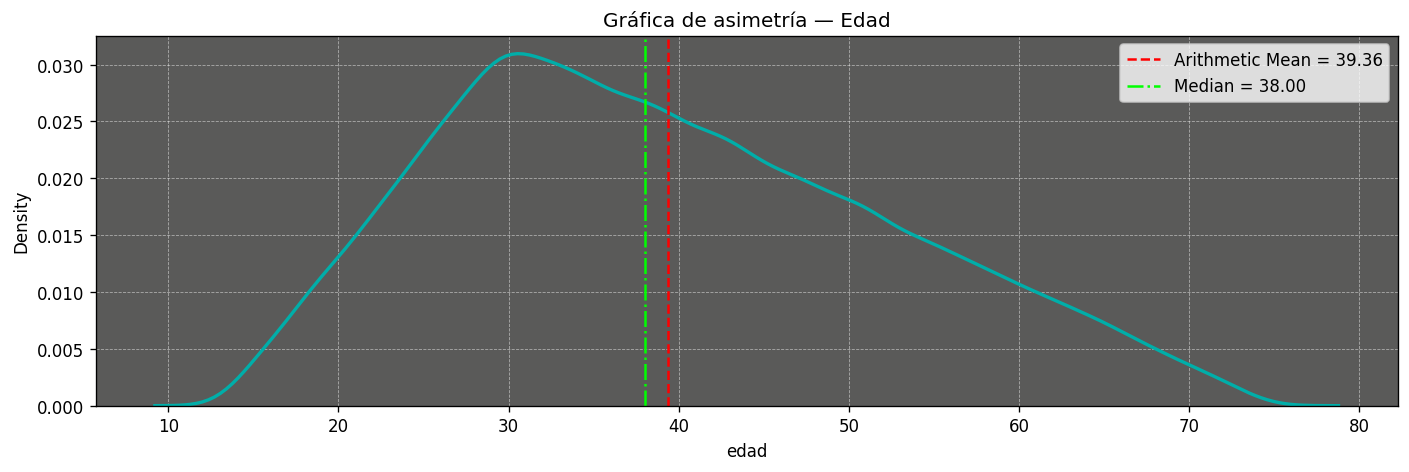

The asymmetry coefficient is: 0.39
The mode is: 30
The median is: 38.0
The arithmetic mean is: 39.36
The variance is: 171.13
The deviation: 13.08
The coefficient variation is: 33.23


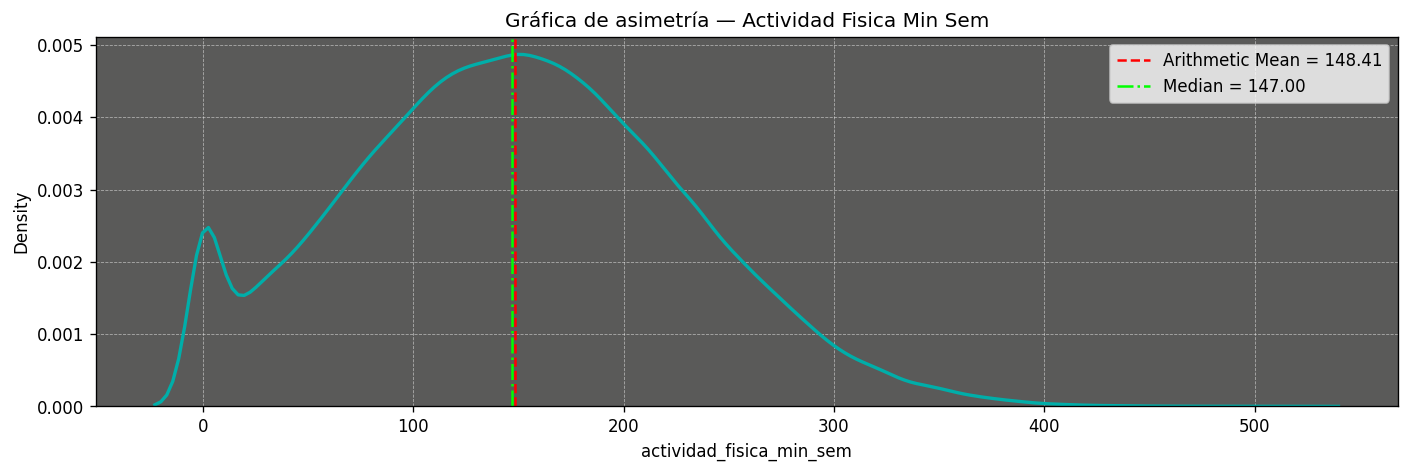

The asymmetry coefficient is: 0.18
The mode is: 0
The median is: 147.0
The arithmetic mean is: 148.41
The variance is: 6284.79
The deviation: 79.28
The coefficient variation is: 53.42


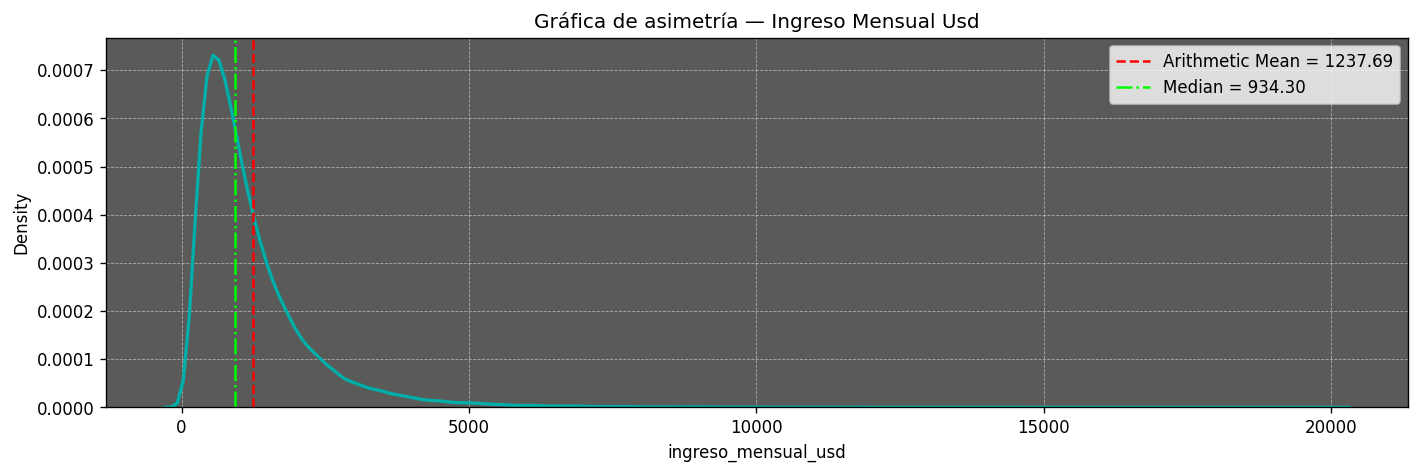

The asymmetry coefficient is: 3.14
The mode is: 471.9599914550781
The median is: 934.2999877929688
The arithmetic mean is: 1237.68994140625
The variance is: 1148264.75
The deviation: 1071.5699462890625
The coefficient variation is: 86.58


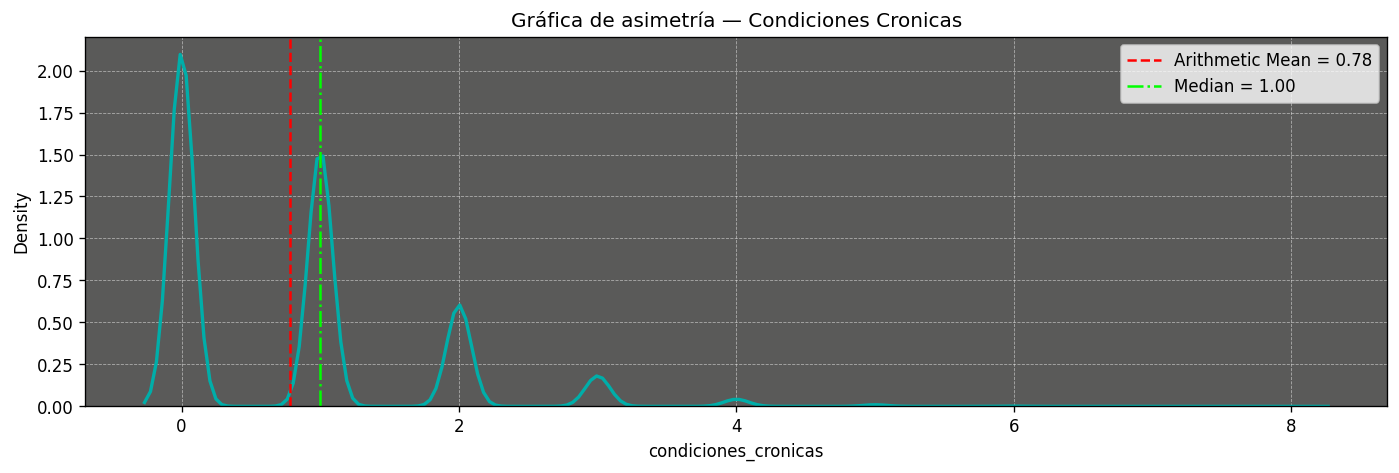

The asymmetry coefficient is: 1.31
The mode is: 0
The median is: 1.0
The arithmetic mean is: 0.78
The variance is: 0.85
The deviation: 0.92
The coefficient variation is: 117.95


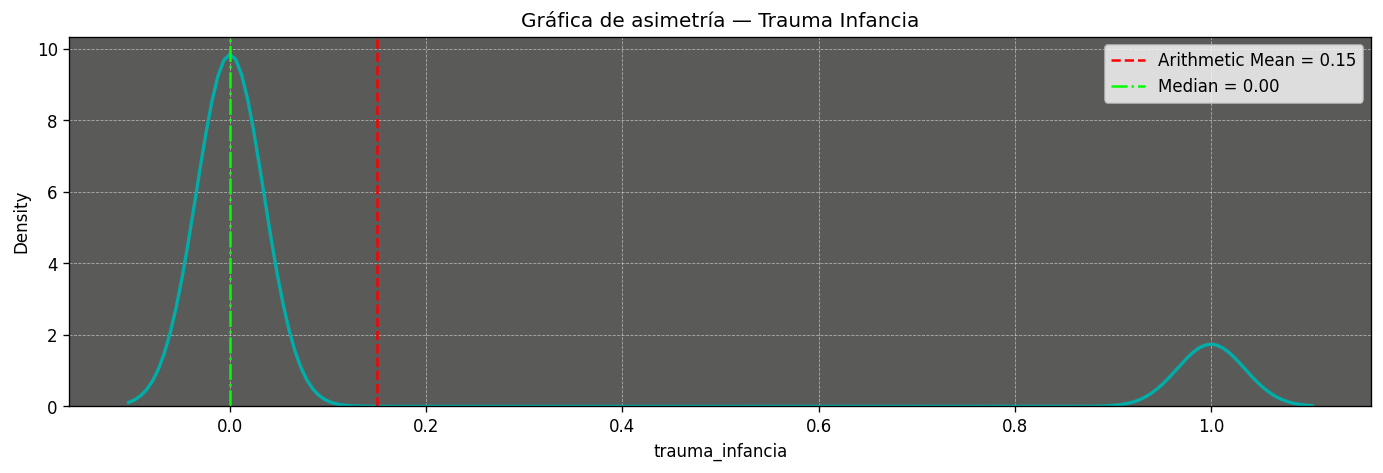

The asymmetry coefficient is: 1.91
The mode is: 0
The median is: 0.0
The arithmetic mean is: 0.15
The variance is: 0.13
The deviation: 0.36
The coefficient variation is: 240.00


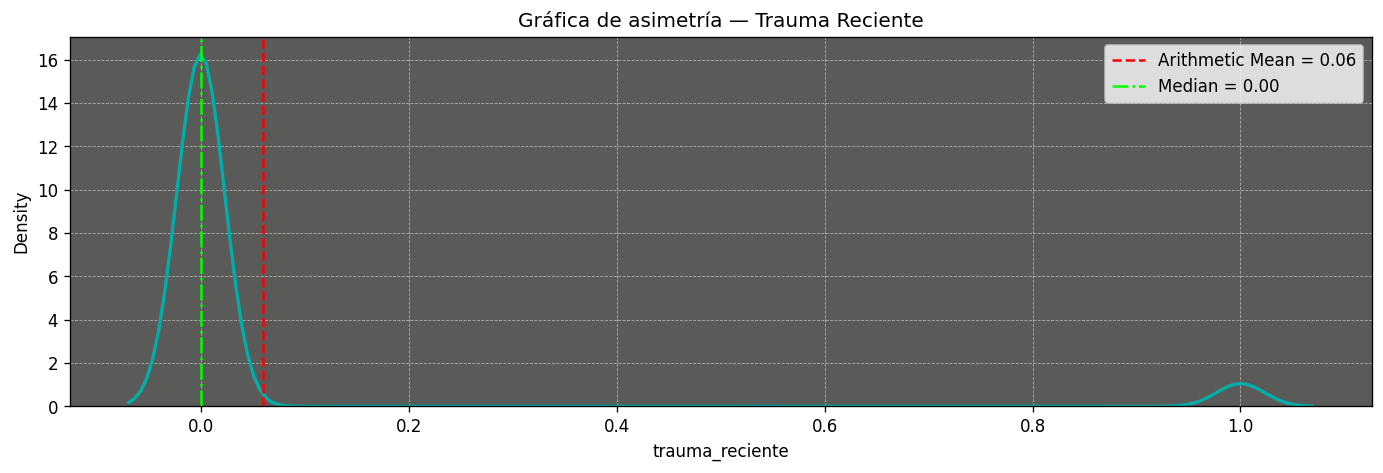

The asymmetry coefficient is: 3.64
The mode is: 0
The median is: 0.0
The arithmetic mean is: 0.06
The variance is: 0.06
The deviation: 0.24
The coefficient variation is: 400.00


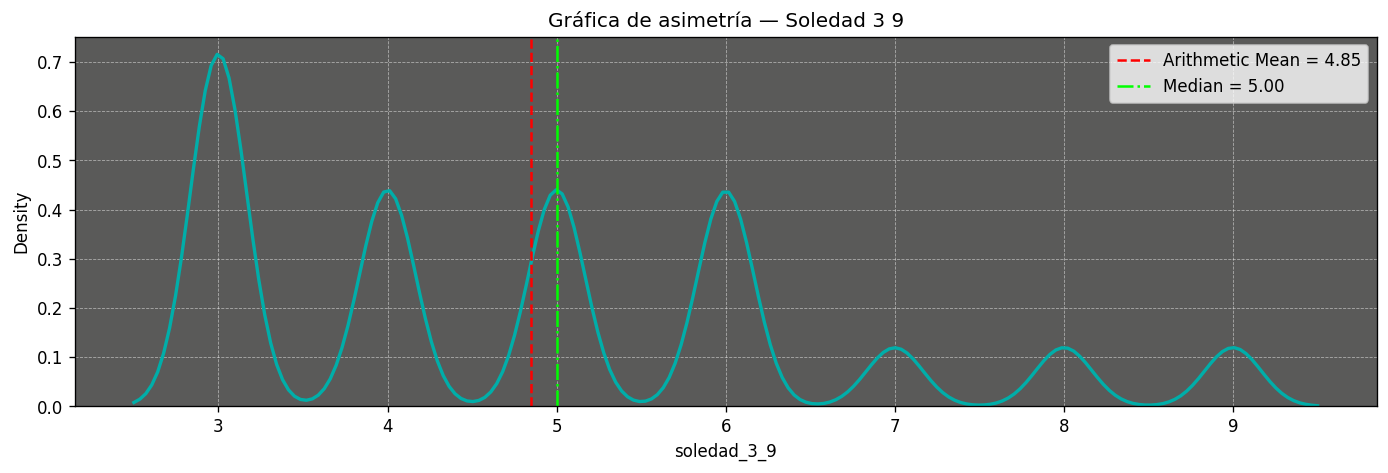

The asymmetry coefficient is: 0.75
The mode is: 3
The median is: 5.0
The arithmetic mean is: 4.85
The variance is: 2.99
The deviation: 1.73
The coefficient variation is: 35.67


In [7]:
list_col_cuantitative = [
    'edad',
    'actividad_fisica_min_sem',
    'ingreso_mensual_usd',
    'condiciones_cronicas',
    'trauma_infancia',
    'trauma_reciente',
    'soledad_3_9'
]

for col in list_col_cuantitative:
    strb.asymmetry_coefficient(df[col], "P", True)
    print(f'The mode is: {strb.mode(df[col])}')
    print(f'The median is: {strb.median(df[col])}')
    print(f'The arithmetic mean is: {strb.arithmetic_mean(df[col])}')
    print(f'The variance is: {strb.variance(df[col], "P")}')
    print(f'The deviation: {strb.deviation(df[col], "P")}')
    strb.coefficient_variation(df[col], "P", True)

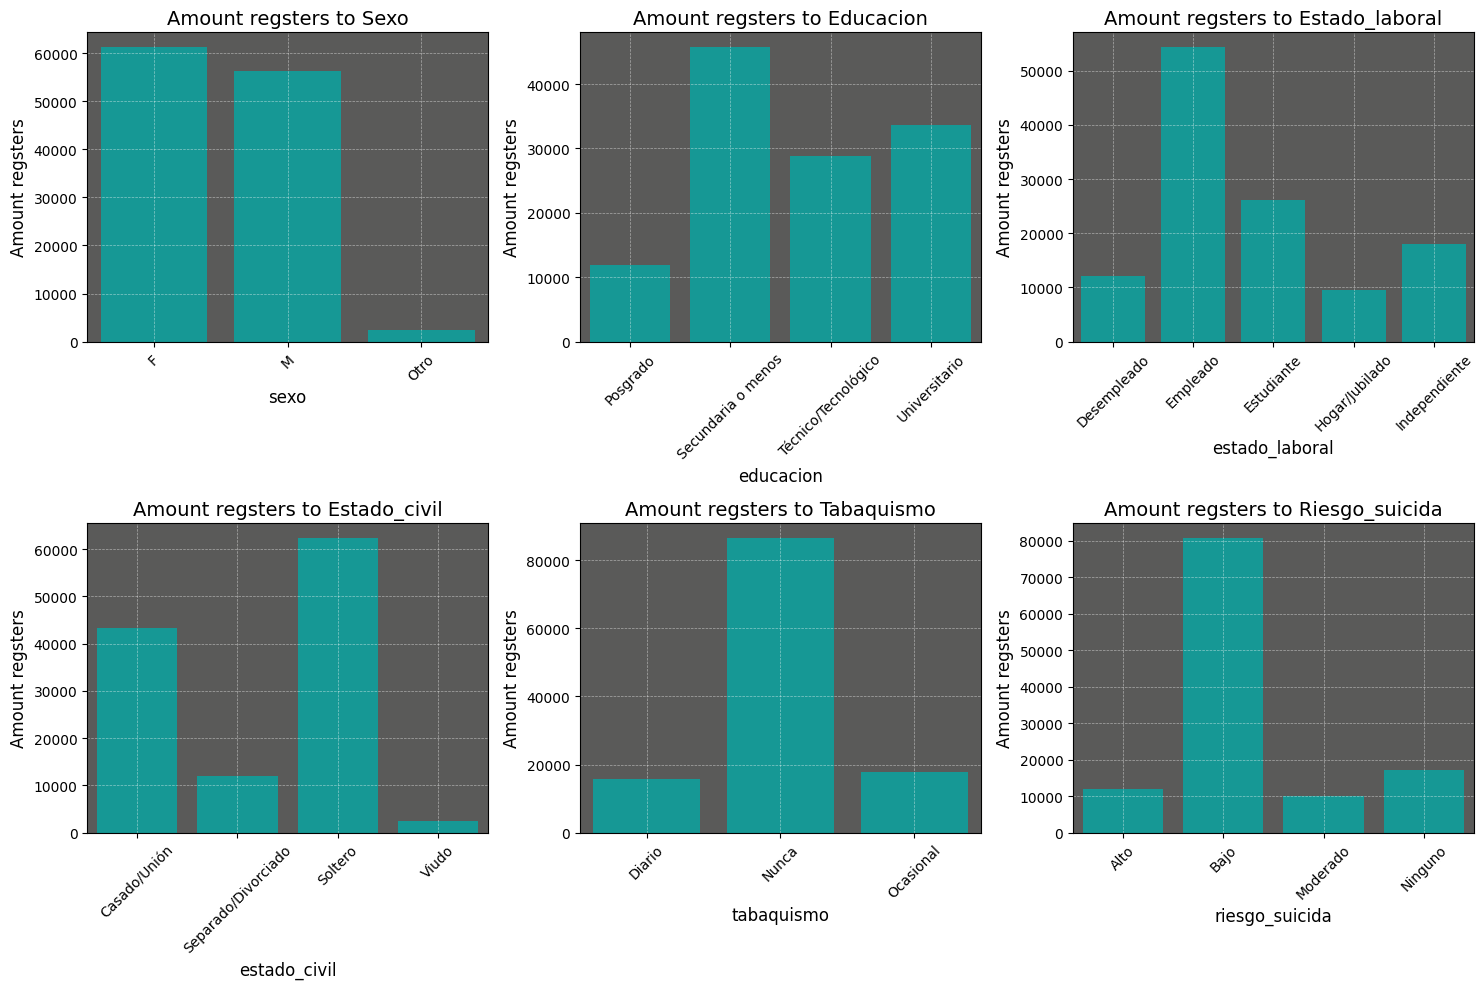

In [6]:
figles = (15, 10)
lis_cols = [
    'sexo',
    'educacion',
    'estado_laboral',
    'estado_civil',
    'tabaquismo',
    'riesgo_suicida',
]
strb.grafic_multi_elements_barplot(figles, 2, 3, df, lis_cols)